<a href="https://colab.research.google.com/github/matheustguimaraes/mineracao-trabalho4/blob/master/Trabalho_4_Mineracao_de_Dados_Matheus_Guimar%C3%A3es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 4 da disciplina de Mineração de Dados [CK0223]
### Nome: Matheus Teixeira Guimarães
### Matrícula: 434054
### Professor: Dr. José Antônio Fernandes de Macedo

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, plot_confusion_matrix

## 1. Importar e separar o conjunto de dados fornecido em treinamento e teste;

In [ ]:
df = pd.read_csv('noticias.csv', delimiter=",")

In [ ]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [ ]:
df = df.rename(columns={'Unnamed: 0': 'id'})

In [ ]:
df.head(5)

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.shape

(6335, 4)

In [ ]:
df['titleAndText'] = df['title'] + ' ' + df['text']

In [ ]:
X, y = df['titleAndText'], df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Criar uma matriz vetorizada que represente os textos utilizando o Count Vectorizer;


In [ ]:
# conjunto de treino e teste vetorizados pelo CountVectorizer
cvectorizer = CountVectorizer()
X_train_c = cvectorizer.fit_transform(X_train)
X_test_c = cvectorizer.transform(X_test)
X_train_c_array = X_train_c.toarray()

tvectorizer = TfidfVectorizer()
X_train_t = tvectorizer.fit_transform(X_train)
X_test_t = tvectorizer.transform(X_test)
X_train_t_array = X_train_t.toarray()

In [ ]:
X_train_c_array

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## 3. Criar uma matriz vetorizada que represente os textos utilizando o TF-IDF Vectorizer;

In [ ]:
X_train_c_array

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## 4. Criar dois modelos para classificar os textos utilizando o algoritmo Naive Bayes (multinomial) utilizando o CountVectorizer e o TfidfVectorizer;

### Naive Bayes utilizando dataset com Count Vectorizer

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_c, y_train)
mnb_prediction = mnb.predict(X_test_c)

In [ ]:
mnb_results = np.array(list(zip(y, mnb_prediction)))
mnb_results = pd.DataFrame(mnb_results, columns=['label', 'prediction'])
mnb_results.sample(10)

,label,prediction
372,REAL,REAL
400,REAL,FAKE
60,FAKE,REAL
473,REAL,REAL
975,REAL,FAKE
272,REAL,REAL
1181,REAL,FAKE
391,FAKE,FAKE
21,FAKE,REAL
1146,FAKE,REAL


### Naive Bayes utilizando dataset com TF-IDF Vectorizer

In [ ]:
mnb2 = MultinomialNB()
mnb2.fit(X_train_t, y_train)
mnb_prediction2 = mnb.predict(X_test_t)

In [ ]:
mnb_results2 = np.array(list(zip(y, mnb_prediction2)))
mnb_results2 = pd.DataFrame(mnb_results2, columns=['label', 'prediction'])
mnb_results2.sample(10)

,label,prediction
467,REAL,REAL
380,FAKE,REAL
910,REAL,FAKE
1066,REAL,FAKE
571,FAKE,REAL
1052,REAL,FAKE
650,FAKE,FAKE
249,REAL,REAL
515,REAL,REAL
971,REAL,REAL


## 5. Comparar os resultados utilizando a precisão e a Matriz de Confusão;


### Count Vectorizer

In [ ]:
print(classification_report(y_test, mnb_prediction))

              precision    recall  f1-score   support

        FAKE       0.93      0.87      0.90       628
        REAL       0.88      0.93      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



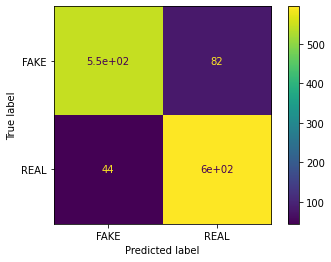

In [ ]:
plot_confusion_matrix(mnb, X_test_c, y_test)
plt.show()

### TF-IDF Vectorizer

In [ ]:
print(classification_report(y_test, mnb_prediction2))

              precision    recall  f1-score   support

        FAKE       0.89      0.91      0.90       628
        REAL       0.91      0.89      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



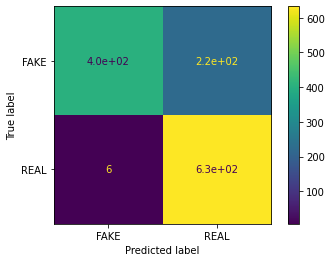

In [ ]:
plot_confusion_matrix(mnb2, X_test_t, y_test)
plt.show()

Para *Count Vectorizer* os valores de precisão foram 93% para FAKE e 87% para REAL. Para *TF-IDF Vectorizer*, os valores de precisão foram 89% para FAKE, e 91% para REAL.

Na matriz de confusão é possível ver que *Count Vectorizer* erra menos ao dizer se a notícia é FAKE do que ao dizer se é REAL. Esse mesmo padrão é encontrado em *TF-IDF Vectorizer*.



### 6. [BÔNUS] Propor passos adicionais para melhorar os resultados encontrados.

Para melhorar os resultados, sugiro rodar o método de GridSearch (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) em todos os dados, aumentando assim a amostra de hiper-parâmetros para treinamento do modelo.